In [1]:
import pandas as pd
import glob
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pickle 
import sys

sys.path.append('../utils')

from text.utils import Book, process_book_content, split_sentences

# Text cleansing

## Search all files inside base path

In [2]:
# Path for books searching
BOOKS_BASE_PATH = '../books/'

#### Organizing books by author

In [3]:
authors = []

for author in glob.glob(os.path.join(BOOKS_BASE_PATH, '*'), ):
    if os.path.isdir(author):
        authors.append(os.path.basename(author))
        print('Author found: {}'.format(authors[len(authors) - 1]))

Author found: Oscar Wilde
Author found: Friedrich Nietzsche
Author found: Ernest Hemingway


In [4]:
total_books = 0
books = []

for author in authors:
    for path in glob.glob(os.path.join(BOOKS_BASE_PATH, author, '*.txt')):
        name = os.path.basename(os.path.splitext(path)[0])
        books.append(Book(name, author, path))
        print('Book added: {}'.format(books[len(books) - 1]))

Book added: Name: A house of Pomegranates   Author: Oscar Wilde
Book added: Name: The Canterville ghost   Author: Oscar Wilde
Book added: Name: The happy prince and other tales   Author: Oscar Wilde
Book added: Name: Essays and lectures   Author: Oscar Wilde
Book added: Name: De profundis   Author: Oscar Wilde
Book added: Name: The picture of Dorian Gray   Author: Oscar Wilde
Book added: Name: The soul of man   Author: Oscar Wilde
Book added: Name: The dawn of day   Author: Friedrich Nietzsche
Book added: Name: The antichrist   Author: Friedrich Nietzsche
Book added: Name: We philologists   Author: Friedrich Nietzsche
Book added: Name: Ecce Homo   Author: Friedrich Nietzsche
Book added: Name: Thoughts out of season   Author: Friedrich Nietzsche
Book added: Name: The joyful wisdom   Author: Friedrich Nietzsche
Book added: Name: The will to power   Author: Friedrich Nietzsche
Book added: Name: The birth of tragedy   Author: Friedrich Nietzsche
Book added: Name: Thus spake Zarathustra   A

## Defining cleansing functions

License removal was done manually, here only clean books are considered

In [5]:
# Process all books
paragraphs_df = pd.DataFrame(data=[], columns=['Book name', 'Pre processed', 'Post processed', 'Content-length'])

for idx, book in enumerate(books):
    row = [] 
    row.append(book.name)
    row.append(len(book.content))
    book.content = process_book_content(book)
    row.append(len(book.content))
    book.content = ' '.join(book.content)
    row.append(len(book.content))
    paragraphs_df.loc[idx] = row

display(paragraphs_df)

,Book name,Pre processed,Post processed,Content-length
0,A house of Pomegranates,568,536,166006
1,The Canterville ghost,108,95,59437
2,The happy prince and other tales,405,395,83297
3,Essays and lectures,511,440,251106
4,De profundis,119,81,59941
5,The picture of Dorian Gray,1509,1369,375764
6,The soul of man,56,39,52852
7,The dawn of day,1328,605,417028
8,The antichrist,194,113,122177
9,We philologists,540,246,77728


# Sentences split

In [6]:
for book in books:
    book.content = split_sentences(book.content)

# Statistics calc

In [7]:
dataframe = pd.DataFrame(data=[], columns=['book', 'author', 'num_sentences', 'lengths_sum'])

for idx, book in enumerate(books):
    lengths = [len(sentence) for sentence in book.content]
    dataframe.loc[idx] = [book.name, book.author, len(lengths), np.sum(lengths)]

# Book statistics
book_statistics = dataframe.copy()
book_statistics['mean'] = book_statistics['lengths_sum']  / book_statistics['num_sentences']
    
# Author statistics
author_statistics = dataframe.copy()
author_statistics = author_statistics.groupby('author').agg({'num_sentences': 'sum', 'lengths_sum': 'sum'})
author_statistics['mean'] = author_statistics['lengths_sum']  / author_statistics['num_sentences']

# General statistics
general_statistics = dataframe.copy().drop(['book', 'author'], axis=1)
general_statistics = general_statistics.agg({'num_sentences': 'sum', 'lengths_sum': 'sum'})
general_statistics['mean'] = general_statistics['lengths_sum']  / general_statistics['num_sentences']

display(dataframe)
display(book_statistics)
display(author_statistics)
display(general_statistics.head())
#author_gp = dataframe.groupby('Author')
#author_gp = author_gp.apply(lambda x: x['Total sentences'] * x['Mean'] )
#author_gp.agg({'Total sentences': 'sum' })
#display()

,book,author,num_sentences,lengths_sum
0,A house of Pomegranates,Oscar Wilde,1349,35134
1,The Canterville ghost,Oscar Wilde,390,11975
2,The happy prince and other tales,Oscar Wilde,961,17804
3,Essays and lectures,Oscar Wilde,1470,47586
4,De profundis,Oscar Wilde,493,12257
5,The picture of Dorian Gray,Oscar Wilde,4921,77544
6,The soul of man,Oscar Wilde,542,10106
7,The dawn of day,Friedrich Nietzsche,1917,79549
8,The antichrist,Friedrich Nietzsche,930,23021
9,We philologists,Friedrich Nietzsche,632,14306


,book,author,num_sentences,lengths_sum,mean
0,A house of Pomegranates,Oscar Wilde,1349,35134,26.0445
1,The Canterville ghost,Oscar Wilde,390,11975,30.7051
2,The happy prince and other tales,Oscar Wilde,961,17804,18.5265
3,Essays and lectures,Oscar Wilde,1470,47586,32.3714
4,De profundis,Oscar Wilde,493,12257,24.8621
5,The picture of Dorian Gray,Oscar Wilde,4921,77544,15.7578
6,The soul of man,Oscar Wilde,542,10106,18.6458
7,The dawn of day,Friedrich Nietzsche,1917,79549,41.4966
8,The antichrist,Friedrich Nietzsche,930,23021,24.7538
9,We philologists,Friedrich Nietzsche,632,14306,22.6361


,num_sentences,lengths_sum,mean
author,,,
Ernest Hemingway,23859,310512,13.014460
Friedrich Nietzsche,18367,559128,30.441988
Oscar Wilde,10126,212406,20.976299


num_sentences    5.235200e+04
lengths_sum      1.082046e+06
mean             2.066867e+01
dtype: float64

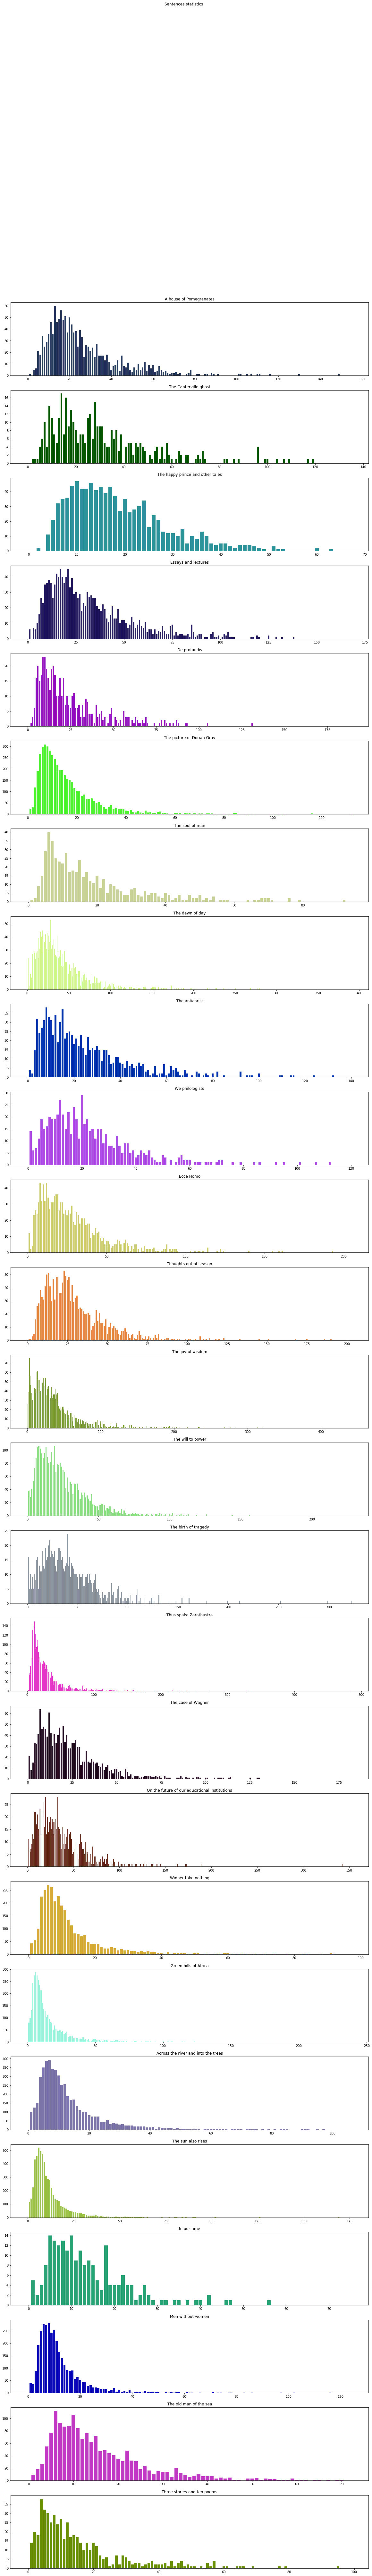

In [8]:
fig, axs = plt.subplots(len(books), figsize=(20, 5 * len(books)))
fig.suptitle('Sentences statistics')

for idx, book in enumerate(books):
    lengths = [len(sentence) for sentence in book.content]
    histogram, bins = np.histogram(lengths, bins=range(np.max(lengths)))
    axs[idx].set_title(book.name)
    axs[idx].bar(bins[:-1], histogram, color=np.random.rand(3,))


# Saving

In [9]:
DATASET_BASE_PATH = '../datasets/'
DATASET_NAME = 'books.pk'

In [10]:
with open(os.path.join(DATASET_BASE_PATH, DATASET_NAME), 'wb') as f:
    pickle.dump(books, f)